In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
get_ipython().run_line_magic('matplotlib', 'inline')
%config InlineBackend.figure_format = 'svg'

In [2]:
path_runcontrol = Path('baserun')/ 'RunControl_ERA5.nml'
df_state_init = sp.init_supy(path_runcontrol)
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

2020-06-17 16:38:04,466 - SuPy - INFO - All cache cleared.
2020-06-17 16:38:05,966 - SuPy - INFO - All cache cleared.


#### Three scenario Used
1. Initial conditions used in sample data - Used Suffix: none
2. Building fraction = 0. grass = .41 - Population day/night = 0 - Used Suffix: _r         ("Rural" Conditions)
3. Building fraction = 0.05 grass = .36 - Population day/night = 5% of initial - Used Suffix: _rb      ("Rural"conditons with Building)

2020-06-17 16:34:21,936 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-17 16:34:22,108 - SuPy - INFO - All checks for `df_state` passed!
2020-06-17 16:34:22,108 - SuPy - INFO - ====================
2020-06-17 16:34:22,108 - SuPy - INFO - Simulation period:
2020-06-17 16:34:22,108 - SuPy - INFO -   Start: 2012-01-01 00:05:00
2020-06-17 16:34:22,108 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-17 16:34:22,108 - SuPy - INFO - 
2020-06-17 16:34:22,108 - SuPy - INFO - No. of grids: 1
2020-06-17 16:34:22,108 - SuPy - INFO - SuPy is running in serial mode
2020-06-17 16:35:15,233 - SuPy - INFO - Execution time: 53.1 s
2020-06-17 16:35:15,233 - SuPy - INFO - ====================



In [3]:
# If building is set to Zero when using the ERA5 forcing dataset, the kernel die. "dead kernel".
# This does not happen when using the sample dataset.

df_state_r = df_state_init.copy()
df_state_r.loc[:, ('sfr', '(1,)')] = 0.000000001 #Building
df_state_r.loc[:, ('sfr', '(4,)')] = 0.40000009 #Grass
df_state_r.popdensdaytime = 0
df_state_r.popdensnighttime = 0 
sp.check_state(df_state_r)

df_state_rb = df_state_init.copy()
df_state_rb.loc[:, ('sfr', '(1,)')] = .05 #Building
df_state_rb.loc[:, ('sfr', '(4,)')] = 0.36 #Grass
df_state_rb.popdensdaytime = df_state_init.popdensdaytime * 0.05
df_state_rb.popdensnighttime = df_state_init.popdensnighttime * 0.05 
sp.check_state(df_state_rb)

2020-06-17 16:38:08,231 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-17 16:38:08,387 - SuPy - INFO - All checks for `df_state` passed!
2020-06-17 16:38:08,403 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-17 16:38:08,559 - SuPy - INFO - All checks for `df_state` passed!


In [4]:
# Run SuPy initial conditions
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init);
df_output_suews = df_output['SUEWS'];

# Run SuPy with modified environment add _r for recognition later on
df_r_output, df_state_r_final = sp.run_supy(df_forcing, df_state_r);
df_r_output_suews = df_r_output['SUEWS'];
df_r_output_suews = df_r_output_suews.add_suffix('_r');

# Run SuPy with modified environment add _rb for recognition later on
df_rb_output, df_state_rb_final = sp.run_supy(df_forcing, df_state_rb);
df_rb_output_suews = df_rb_output['SUEWS'];
df_rb_output_suews = df_rb_output_suews.add_suffix('_rb');

2020-06-17 16:38:08,574 - SuPy - INFO - ====================
2020-06-17 16:38:08,574 - SuPy - INFO - Simulation period:
2020-06-17 16:38:08,574 - SuPy - INFO -   Start: 2012-01-01 00:05:00
2020-06-17 16:38:08,574 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-17 16:38:08,574 - SuPy - INFO - 
2020-06-17 16:38:08,574 - SuPy - INFO - No. of grids: 1
2020-06-17 16:38:08,574 - SuPy - INFO - SuPy is running in serial mode
2020-06-17 16:38:34,506 - SuPy - INFO - Execution time: 25.9 s
2020-06-17 16:38:34,506 - SuPy - INFO - ====================

2020-06-17 16:38:34,506 - SuPy - INFO - ====================
2020-06-17 16:38:34,506 - SuPy - INFO - Simulation period:
2020-06-17 16:38:34,506 - SuPy - INFO -   Start: 2012-01-01 00:05:00
2020-06-17 16:38:34,506 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-17 16:38:34,506 - SuPy - INFO - 
2020-06-17 16:38:34,506 - SuPy - INFO - No. of grids: 1
2020-06-17 16:38:34,506 - SuPy - INFO - SuPy is running in serial mode
2020-06-17 16:39:13,121 - S

In [36]:
# RSL
df_output_rsl = df_output['RSL']
df_output_rsl_g = df_output_rsl.loc[grid]
df_output_rsl_r = df_r_output['RSL']
df_output_rsl_r = df_output_rsl_r.add_suffix('_r');
df_output_rsl_r_g = df_output_rsl_r.loc[grid]
df_output_rsl_rb = df_rb_output['RSL']
df_output_rsl_rb = df_output_rsl_rb.add_suffix('_rb');
df_output_rsl_rb_g = df_output_rsl_rb.loc[grid]

In [40]:
# Merge to one dataframe for easier plotting
df_output_suews_g = df_output_suews.loc[grid];
df_r_output_suews_g = df_r_output_suews.loc[grid];
df_rb_output_suews_g = df_rb_output_suews.loc[grid];

df_merge = pd.concat([df_output_suews_g, df_r_output_suews_g,df_rb_output_suews_g],axis=1,join='inner');
df_rsl = pd.concat([df_output_rsl_g,df_output_rsl_r_g,df_output_rsl_rb_g],axis=1,join='inner');

##### Radiation fluxes 23 July - 26 July 2012

In [41]:
# Start and end date
s = '2012 7 23';
e = '2012 7 26'; 

In [44]:
# For easier recognition of sunrise and sundown

def night():
    ax_output.axvspan(pd.Timestamp('2012 7 22 20:30'),pd.Timestamp('2012 7 23 03:30'),alpha=0.07,color='grey')
    ax_output.axvspan(pd.Timestamp('2012 7 23 20:30'),pd.Timestamp('2012 7 24 03:30'),alpha=0.07,color='grey')
    ax_output.axvspan(pd.Timestamp('2012 7 24 20:30'),pd.Timestamp('2012 7 25 03:30'),alpha=0.07,color='grey')
    ax_output.axvspan(pd.Timestamp('2012 7 25 20:30'),pd.Timestamp('2012 7 26 03:30'),alpha=0.07,color='grey')
    ax_output.axvspan(pd.Timestamp('2012 7 26 20:30'),pd.Timestamp('2012 7 27 03:30'),alpha=0.07,color='grey')

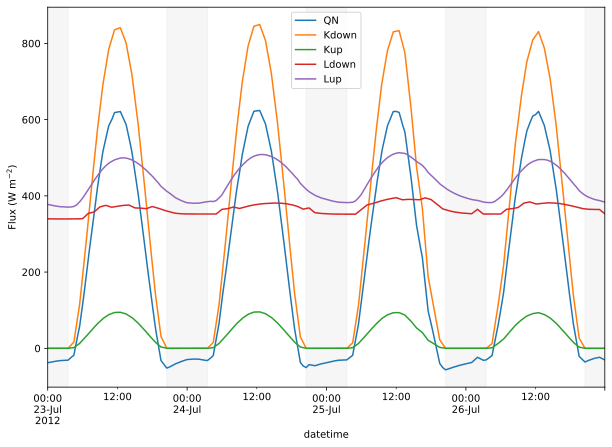

In [38]:
ax_output = df_merge.loc[s:e,['QN', 'Kdown', 'Kup', 'Ldown', 'Lup']].plot(figsize=(10, 7));
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)');
ax_output.legend();
night()

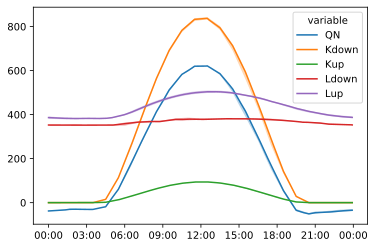

In [39]:
 sp.util.plot_day_clm(df_merge.loc[s:e,['QN', 'Kdown', 'Kup', 'Ldown', 'Lup']]);

##### Wind

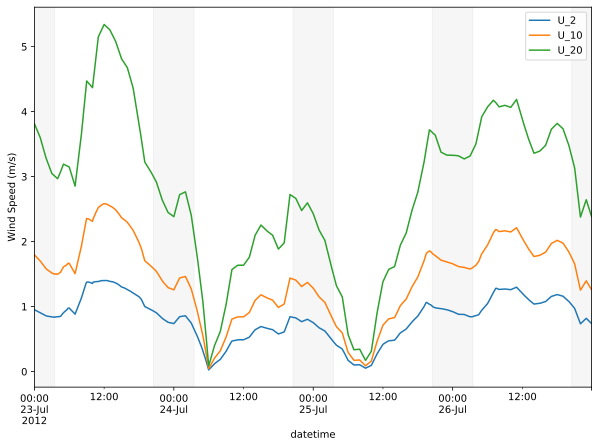

In [45]:
ax_output = df_rsl.loc[s:e,['U_2','U_10','U_20']].plot(figsize=(10, 7));
ax_output.set_ylabel('Wind Speed (m/s)');
ax_output.legend();
night()

##### Temperature 2 magl

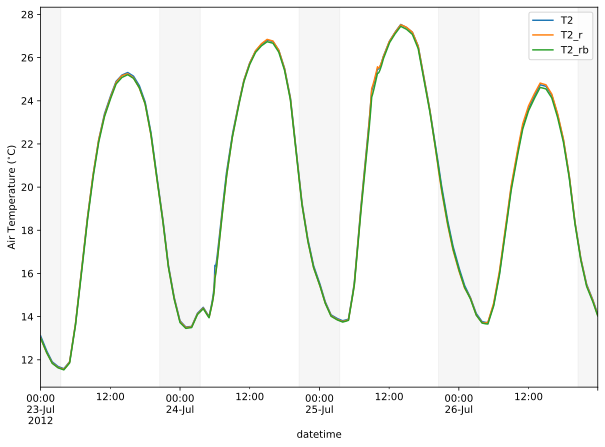

In [14]:
ax_output = df_merge.loc[s:e,['T2','T2_r','T2_rb']].plot(figsize=(10, 7));
ax_output.set_ylabel('Air Temperature ($^{\\circ}}$C)');
ax_output.legend();
night()

##### Relative Humidity (%)

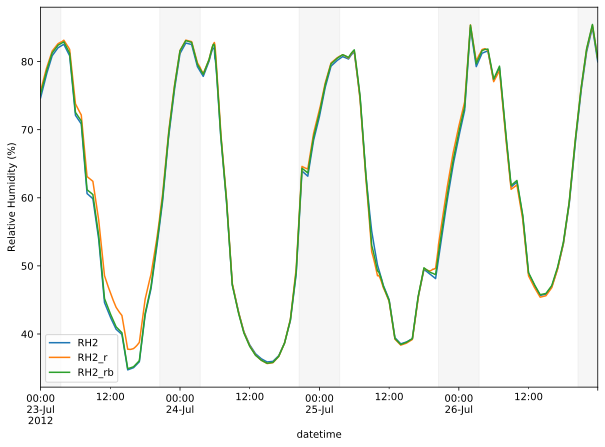

In [17]:
ax_output = df_merge.loc[s:e,['RH2','RH2_r','RH2_rb']].plot(figsize=(10, 7));
ax_output.set_ylabel('Relative Humidity (%)');
ax_output.legend();
night()

##### Specific Humidity (g/kg^-1)

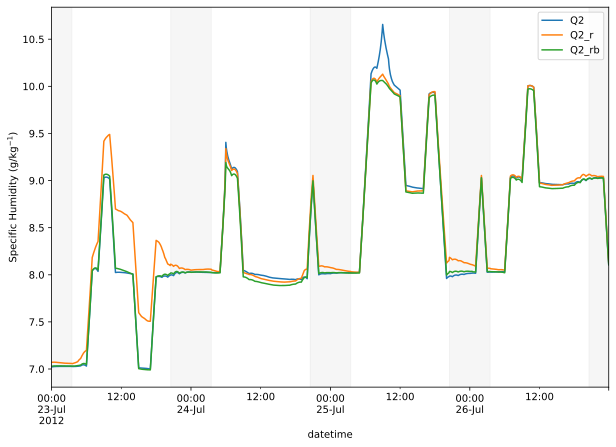

In [19]:
ax_output = df_merge.loc[s:e,['Q2','Q2_r','Q2_rb']].plot(figsize=(10, 7));
ax_output.set_ylabel('Specific Humidity (g/$ \mathrm{kg^{-1}}$)');
ax_output.legend();
night()

##### Friction Velocity

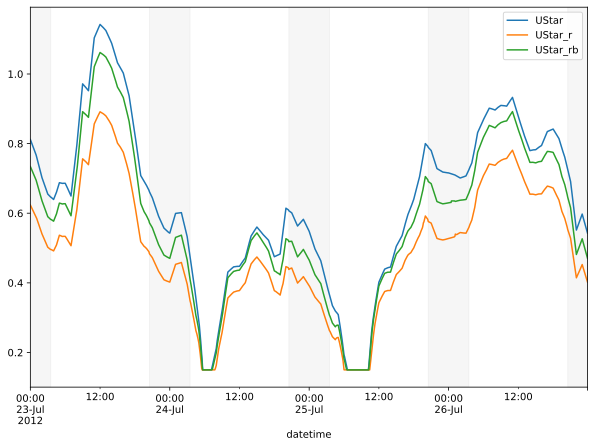

In [20]:
ax_output = df_merge.loc[s:e,['UStar','UStar_r','UStar_rb']].plot(figsize=(10, 7));
ax_output.legend();
night()

##### Resistance

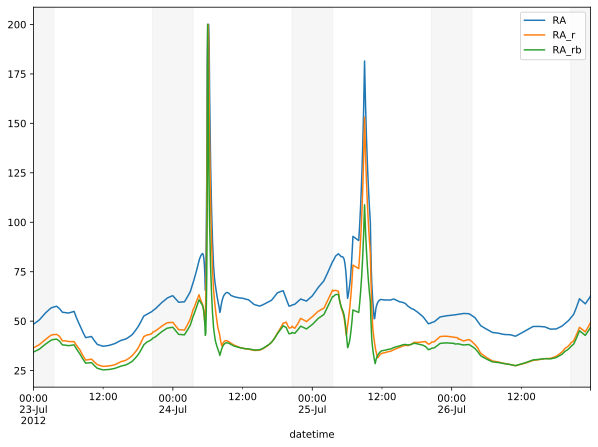

In [21]:
ax_output = df_merge.loc[s:e,['RA','RA_r','RA_rb']].plot(figsize=(10, 7));
ax_output.legend();
night()

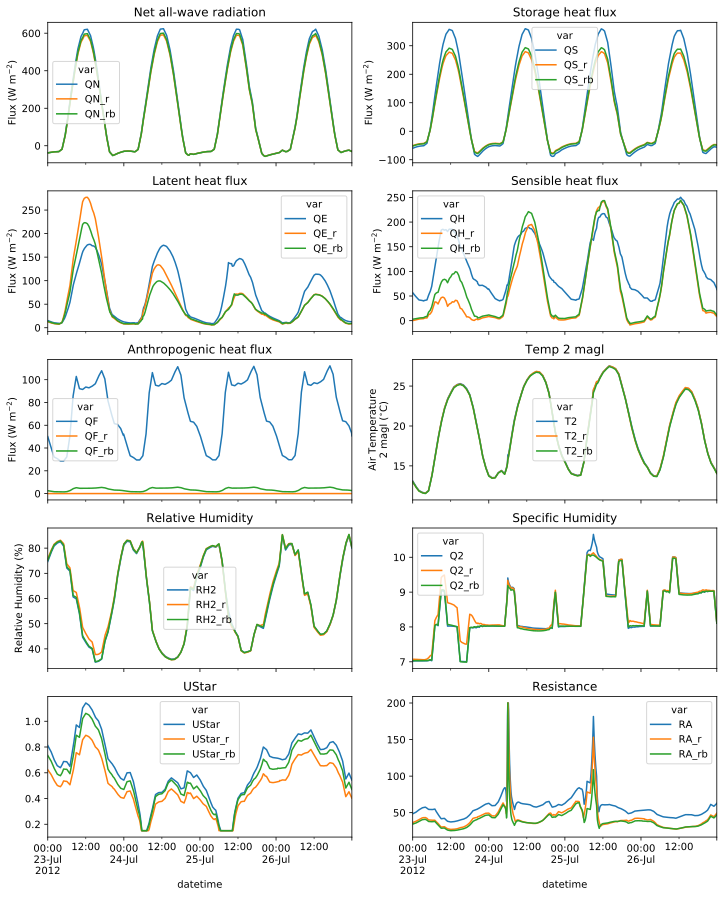

In [22]:
size = (12,15)
fig, axes = plt.subplots(5, 2, sharex=True)
# QN
df_merge.loc[s : e ,['QN','QN_r','QN_rb']].plot(ax=axes[0,0],figsize=size,title='Net all-wave radiation',
    )
# QS
df_merge.loc[s : e ,['QS','QS_r','QS_rb']].plot(ax=axes[0,1],figsize=size,title='Storage heat flux',
    )
# QE
df_merge.loc[s : e ,['QE','QE_r','QE_rb']].plot(ax=axes[1,0],figsize=size,title='Latent heat flux',
    )
# QH
df_merge.loc[s : e ,['QH','QH_r','QH_rb']].plot(ax=axes[1,1],figsize=size,title='Sensible heat flux',
    )
# QF
df_merge.loc[s : e ,['QF','QF_r','QF_rb']].plot(ax=axes[2,0],figsize=size,title='Anthropogenic heat flux',
    )
# T2
df_merge.loc[s : e ,['T2','T2_r','T2_rb']].plot(ax=axes[2,1],figsize=size,title='Temp 2 magl',
    )
# RH
df_merge.loc[s : e ,['RH2','RH2_r','RH2_rb']].plot(ax=axes[3,0],figsize=size,title='Relative Humidity',
    )
# RH
df_merge.loc[s : e ,['Q2','Q2_r','Q2_rb']].plot(ax=axes[3,1],figsize=size,title='Specific Humidity',
    )
# Friction Velocity
df_merge.loc[s : e ,['UStar','UStar_r','UStar_rb']].plot(ax=axes[4,0],figsize=size,title='UStar',
    )
# Resistance
df_merge.loc[s : e ,['RA','RA_r','RA_rb']].plot(ax=axes[4,1],figsize=size,title='Resistance',
    )
axes[0,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[0,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,1].set_ylabel('Air Temperature\n2 magl ($^{\\circ}}$C)')
axes[3,0].set_ylabel('Relative Humidity (%)');

# Test RSL-Plot

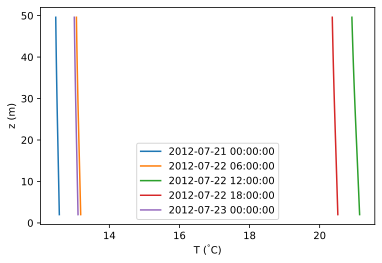

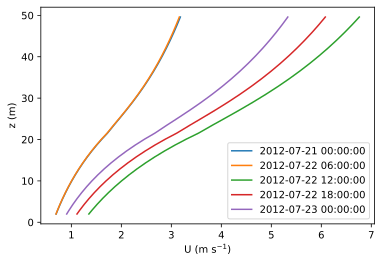

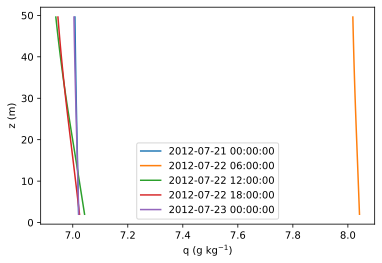

In [23]:
t0 = df_output_rsl_g.loc['2012 07 21 00:00' : '2012 07 21 00:00']
t6 = df_output_rsl_g.loc['2012 07 22 06:00' : '2012 07 22 06:00']
t12 = df_output_rsl_g.loc['2012 07 22 12:00' : '2012 07 22 12:00']
t18 = df_output_rsl_g.loc['2012 07 22 18:00' : '2012 07 22 18:00']
t24 = df_output_rsl_g.loc['2012 07 23 00:00' : '2012 07 23 00:00']
#sp.util.plot_rsl(df_output_rsl.loc['2012-07-22 00:00'])
#df_output_rsl.loc['2012-07-22 12:00', ['T_2']]
df_rsl = pd.concat([t0,t6,t12,t18,t24],join='inner');

sp.util.plot_rsl(df_rsl,'T');
sp.util.plot_rsl(df_rsl,'U');
sp.util.plot_rsl(df_rsl,'q');

##### Rural Conditions

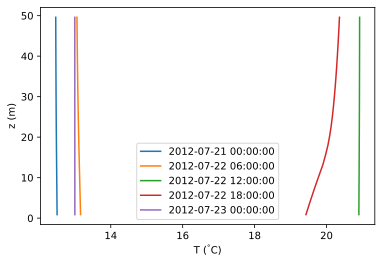

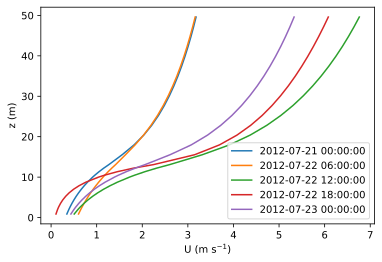

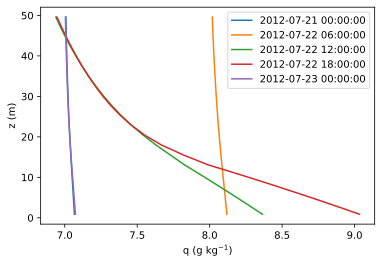

In [24]:
t0 = df_output_rsl_r_g.loc['2012 07 21 00:00' : '2012 07 21 00:00']
t6 = df_output_rsl_r_g.loc['2012 07 22 06:00' : '2012 07 22 06:00']
t12 = df_output_rsl_r_g.loc['2012 07 22 12:00' : '2012 07 22 12:00']
t18 = df_output_rsl_r_g.loc['2012 07 22 18:00' : '2012 07 22 18:00']
t24 = df_output_rsl_r_g.loc['2012 07 23 00:00' : '2012 07 23 00:00']
#sp.util.plot_rsl(df_output_rsl.loc['2012-07-22 00:00'])
#df_output_rsl.loc['2012-07-22 12:00', ['T_2']]
df_rsl_r = pd.concat([t0,t6,t12,t18,t24],join='inner');

sp.util.plot_rsl(df_rsl_r,'T');
sp.util.plot_rsl(df_rsl_r,'U');
sp.util.plot_rsl(df_rsl_r,'q');

##### Rural Buildings

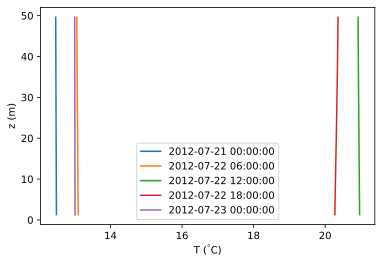

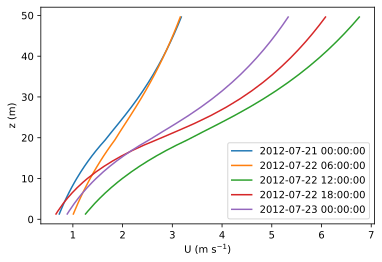

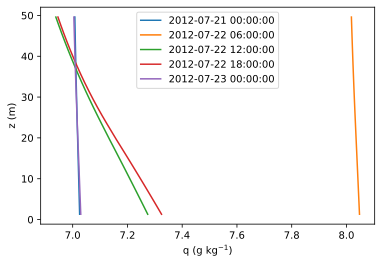

In [49]:
t0 = df_output_rsl_rb_g.loc['2012 07 21 00:00' : '2012 07 21 00:00']
t6 = df_output_rsl_rb_g.loc['2012 07 22 06:00' : '2012 07 22 06:00']
t12 = df_output_rsl_rb_g.loc['2012 07 22 12:00' : '2012 07 22 12:00']
t18 = df_output_rsl_rb_g.loc['2012 07 22 18:00' : '2012 07 22 18:00']
t24 = df_output_rsl_rb_g.loc['2012 07 23 00:00' : '2012 07 23 00:00']
#sp.util.plot_rsl(df_output_rsl.loc['2012-07-22 00:00'])
#df_output_rsl.loc['2012-07-22 12:00', ['T_2']]
df_rsl_rb = pd.concat([t0,t6,t12,t18,t24],join='inner');

sp.util.plot_rsl(df_rsl_rb,'T');
sp.util.plot_rsl(df_rsl_rb,'U');
sp.util.plot_rsl(df_rsl_rb,'q');

# Temperature 
##### initial
##### rural
##### ruralbuilding

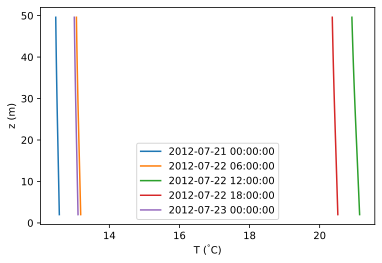

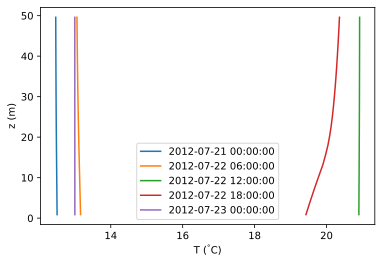

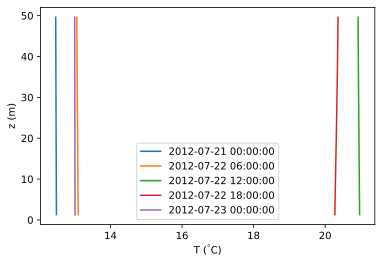

In [50]:
sp.util.plot_rsl(df_rsl,'T');
sp.util.plot_rsl(df_rsl_r,'T');
sp.util.plot_rsl(df_rsl_rb,'T');

##### Initial Conditions

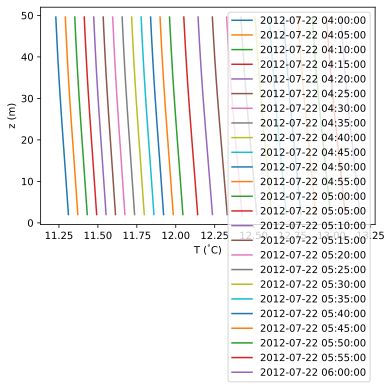

In [51]:
sp.util.plot_rsl(df_output_rsl_g.loc['2012 07 22 04:00' : '2012 07 22 06:00'],'T');


##### Rural Conditions

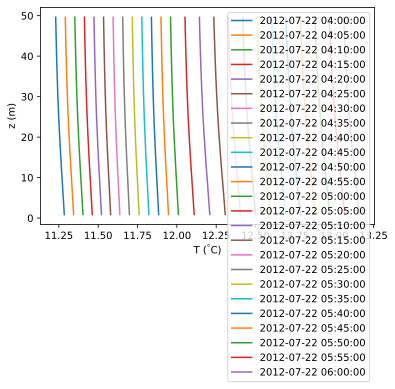

In [52]:
sp.util.plot_rsl(df_output_rsl_r_g.loc['2012 07 22 04:00' : '2012 07 22 06:00'],'T');


##### Rural/building Conditions

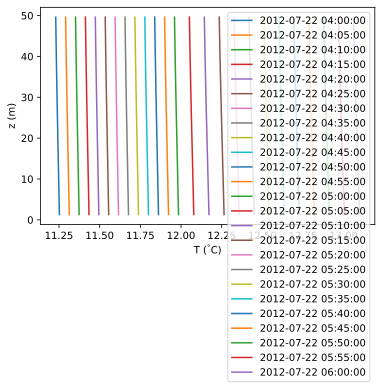

In [53]:
sp.util.plot_rsl(df_output_rsl_rb_g.loc['2012 07 22 04:00' : '2012 07 22 06:00'],'T');